# TITANIC DATA PROJECT 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA

In [3]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [11]:
df['Fare']=df['Fare'].astype(int)

In [12]:
genders = {"male":0,"female":1}
df['Sex'] = df['Sex'].map(genders)


In [13]:
df1 = df.drop(['Ticket','Name','PassengerId'],axis=1)


In [14]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7,NaN,S
1,1,1,1,38.0,1,0,71,C85,C
2,1,3,1,26.0,0,0,7,NaN,S
3,1,1,1,35.0,1,0,53,C123,S
4,0,3,0,35.0,0,0,8,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,NaN,S
887,1,1,1,19.0,0,0,30,B42,S
888,0,3,1,NaN,1,2,23,NaN,S
889,1,1,0,26.0,0,0,30,C148,C


In [15]:
df1['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
CV ="S"
df1['Embarked'] = df1['Embarked'].fillna(CV)

In [17]:
port = {"S":0,"C":1,"Q":2}
df1['Embarked'] = df1['Embarked'].map(port)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30,C148,C


In [19]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7,NaN,0
1,1,1,1,38.0,1,0,71,C85,1
2,1,3,1,26.0,0,0,7,NaN,0
3,1,1,1,35.0,1,0,53,C123,0
4,0,3,0,35.0,0,0,8,NaN,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13,NaN,0
887,1,1,1,19.0,0,0,30,B42,0
888,0,3,1,NaN,1,2,23,NaN,0
889,1,1,0,26.0,0,0,30,C148,1


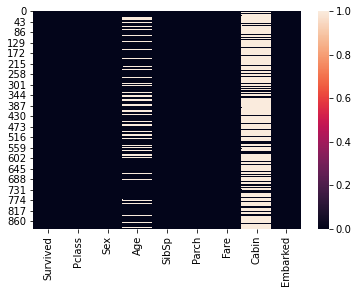

In [20]:
sns.heatmap(df1.isnull())

Cabin has more missing value so better we should drop this

In [21]:
df1 = df1.drop(['Cabin'],axis =1)
mean = df1['Age'].mean()
df1['Age'] = df1['Age'].fillna(mean)

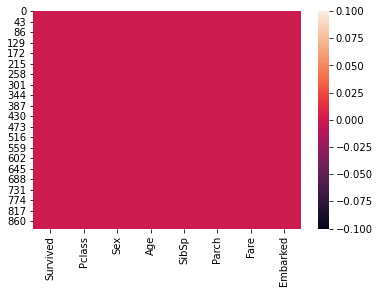

In [22]:
sns.heatmap(df1.isnull())

In [23]:
dfcor = df1.corr()
dfcor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257482,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.550553,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182331,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091773,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159506,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216252,-0.078665
Fare,0.257482,-0.550553,0.182331,0.091773,0.159506,0.216252,1.000000,0.061061
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.061061,1.000000


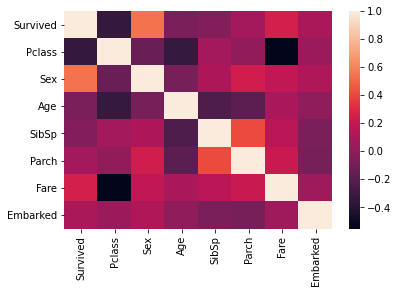

In [24]:
sns.heatmap(dfcor)

In [25]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [26]:
df1.shape

(891, 8)

In [27]:
collist = df1.columns.values
ncol = 8
nrows = 6

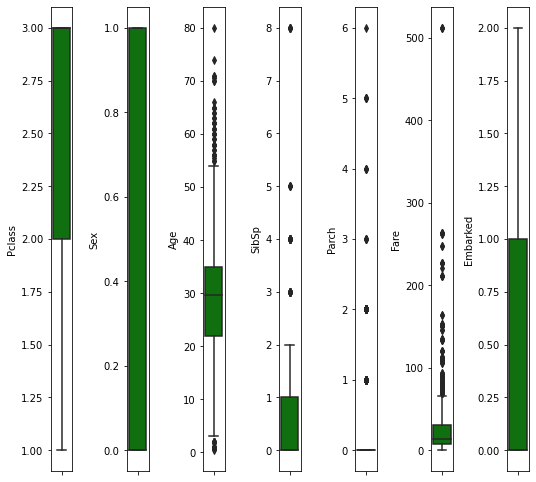

In [28]:
plt.figure(figsize=(ncol,5*ncol))

for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color = "green",orient='v')
    plt.tight_layout()

In [30]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7,0
1,1,1,1,38.000000,1,0,71,1
2,1,3,1,26.000000,0,0,7,0
3,1,1,1,35.000000,1,0,53,0
4,0,3,0,35.000000,0,0,8,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13,0
887,1,1,1,19.000000,0,0,30,0
888,0,3,1,29.699118,1,2,23,0
889,1,1,0,26.000000,0,0,30,1


In [31]:
from scipy.stats import zscore
z= np.abs(zscore(df1))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49894756,
        0.56883712],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78940535,
        1.00518113],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.49894756,
        0.56883712],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17685933,
        0.56883712],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.03594573,
        1.00518113],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49894756,
        2.57919938]])

In [32]:
thresold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [33]:
df_new = df1[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7,0
1,1,1,1,38.000000,1,0,71,1
2,1,3,1,26.000000,0,0,7,0
3,1,1,1,35.000000,1,0,53,0
4,0,3,0,35.000000,0,0,8,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13,0
887,1,1,1,19.000000,0,0,30,0
888,0,3,1,29.699118,1,2,23,0
889,1,1,0,26.000000,0,0,30,1


In [34]:
df_new.shape

(820, 8)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [38]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7,0
1,1,1,1,38.000000,1,0,71,1
2,1,3,1,26.000000,0,0,7,0
3,1,1,1,35.000000,1,0,53,0
4,0,3,0,35.000000,0,0,8,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13,0
887,1,1,1,19.000000,0,0,30,0
888,0,3,1,29.699118,1,2,23,0
889,1,1,0,26.000000,0,0,30,1


In [39]:
df_new_target = pd.DataFrame(df_new.Survived)
df_new_target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [71]:
x = df_new.iloc[:,1:9]

In [72]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7,0
1,1,1,38.000000,1,0,71,1
2,3,1,26.000000,0,0,7,0
3,1,1,35.000000,1,0,53,0
4,3,0,35.000000,0,0,8,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13,0
887,1,1,19.000000,0,0,30,0
888,3,1,29.699118,1,2,23,0
889,1,0,26.000000,0,0,30,1


In [73]:
y = df_new_target
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [74]:
x.shape

(820, 7)

In [75]:
y.shape

(820, 1)

In [76]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 22,random_state =42)

In [77]:
train_x.shape

(798, 7)

In [78]:
test_x.shape

(22, 7)

In [79]:
train_y.shape

(798, 1)

In [80]:
test_y.shape

(22, 1)

In [81]:
lg = LogisticRegression()

In [82]:
lg.fit(train_x,train_y)

LogisticRegression()

In [83]:
pred=lg.predict(test_x)
print(pred)

[0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0]


In [84]:
print("accuracy_score: ",accuracy_score(test_y,pred))

accuracy_score:  0.9545454545454546


In [85]:
print(confusion_matrix(test_y,pred))

[[13  1]
 [ 0  8]]


In [86]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



# Serialization

In [87]:
import joblib
joblib.dump(lg,"titanic_train_Project.pkl")

['titanic_train_Project.pkl']